<a href="https://colab.research.google.com/github/MominaRz/UCI-Heart-Disease-Prediction/blob/main/Heart_Disease_UCI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy pandas scikit-learn matplotlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Loading the dataset
url = "/content/heart_disease_uci.csv"  # Update this path
df = pd.read_csv(url)

# Preview the dataset
print(df.head(5))


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


In [ ]:
# Checking for missing values
print(df.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64


In [ ]:
# Fill missing values with median only for numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
for col in numeric_cols.columns:
    median_value = df[col].median()
    # Replace missing values with the median
    df[col].fillna(median_value, inplace=True)

In [ ]:
# Fill categorical columns with mode
categorical_cols = df.select_dtypes(include=['object'])
for col in categorical_cols.columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Check if all missing values are filled
print(df.isnull().sum())

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [ ]:
# Replace values 2, 3, and 4 with 1 in the 'num' column
df['num'] = df['num'].replace([2, 3, 4], 1)

In [ ]:
# Manually define the categorical variables since they're not type 'object' in this dataset
categorical_vars = ['sex', 'cp', 'fbs', 'dataset','restecg', 'exang', 'slope', 'thal']

# Define the label encoders
label_encoders = {}

# Encode the categorical variables
for column in categorical_vars:
    # Create a new LabelEncoder for the column
    le = LabelEncoder()
    # Fit the encoder and transform the data
    df[column] = le.fit_transform(df[column])
    # Store the encoder in the dictionary
    label_encoders[column] = le

# Display the encoded dataset
print(df.head(5))


   id  age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   1   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   2   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   3   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   4   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   5   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope   ca  thal  num  
0      2.3      0  0.0     0    0  
1      1.5      1  3.0     1    1  
2      2.6      1  2.0     2    1  
3      3.5      0  0.0     1    0  
4      1.4      2  0.0     1    0  


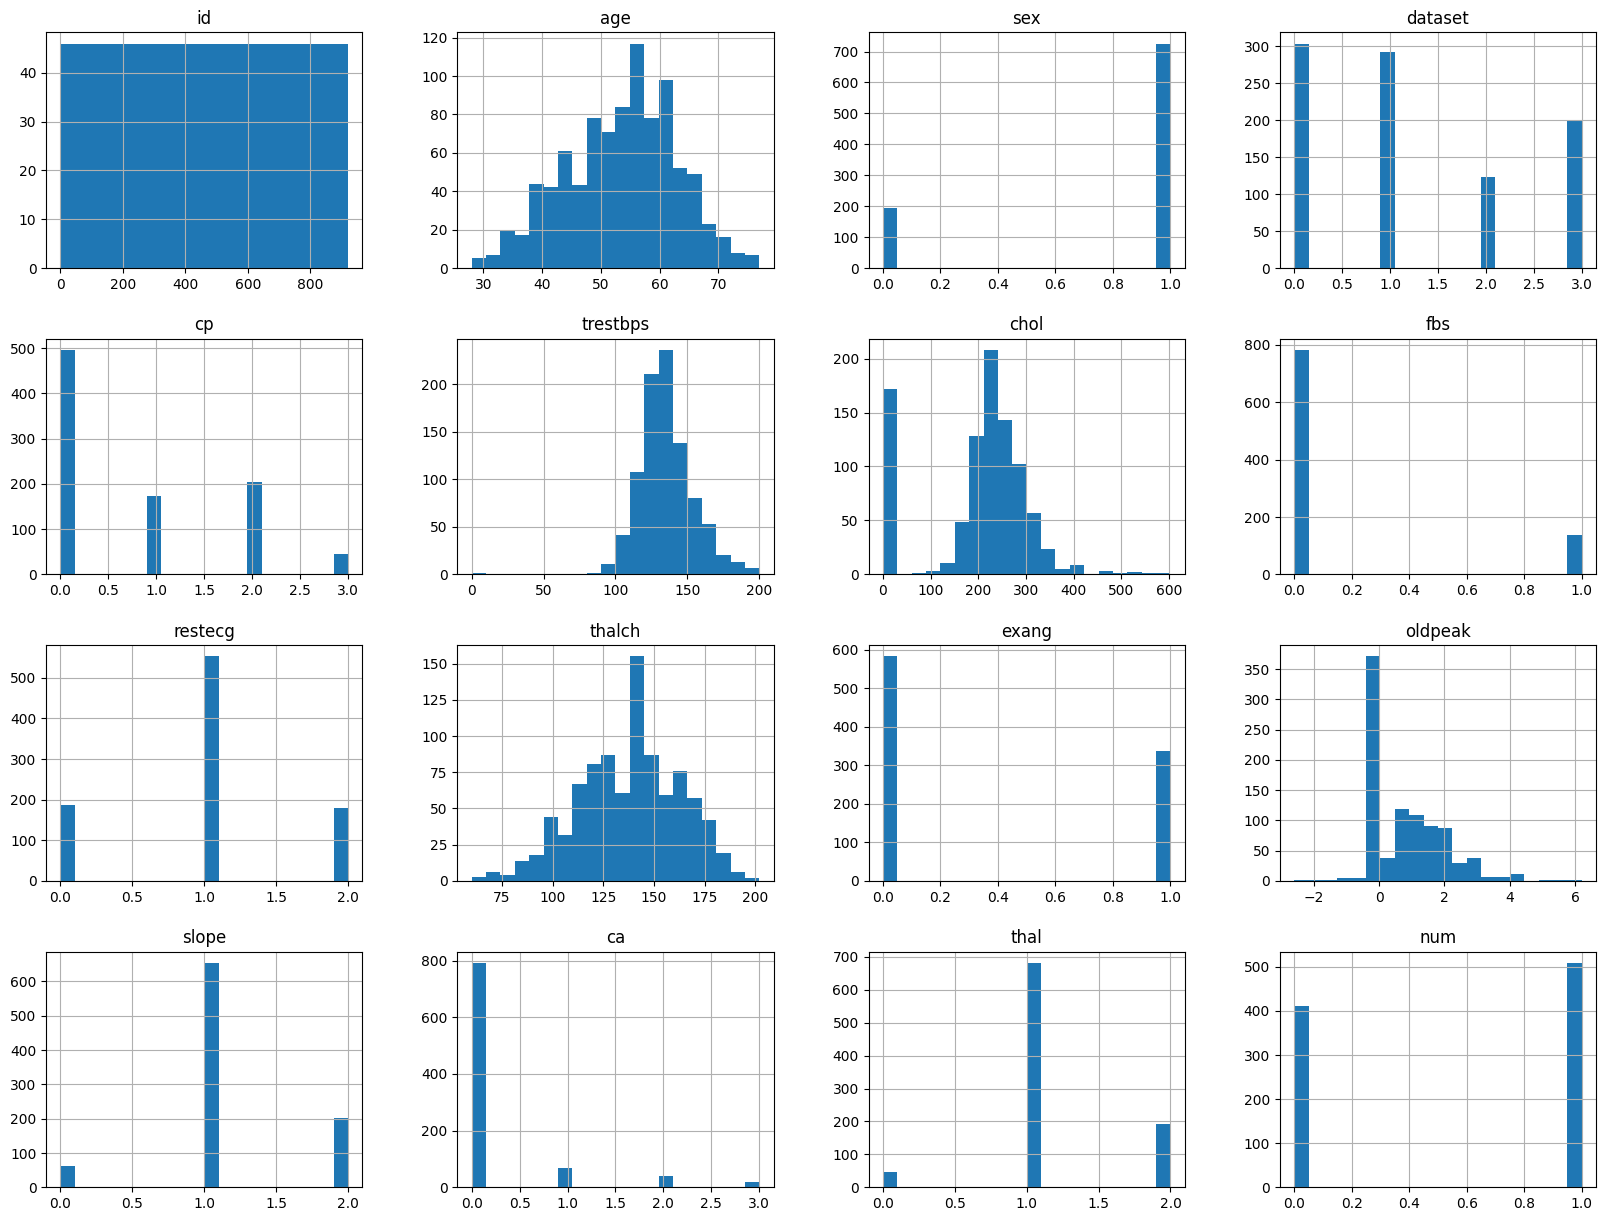

In [ ]:
# Plotting histograms for all features to get better understanding of data
df.hist(bins=20, figsize=(20, 15))
plt.show()

In [ ]:
# Replace 0 values with the mean of the chol column

df['chol'] = df['chol'].replace(0, df['chol'].mean())


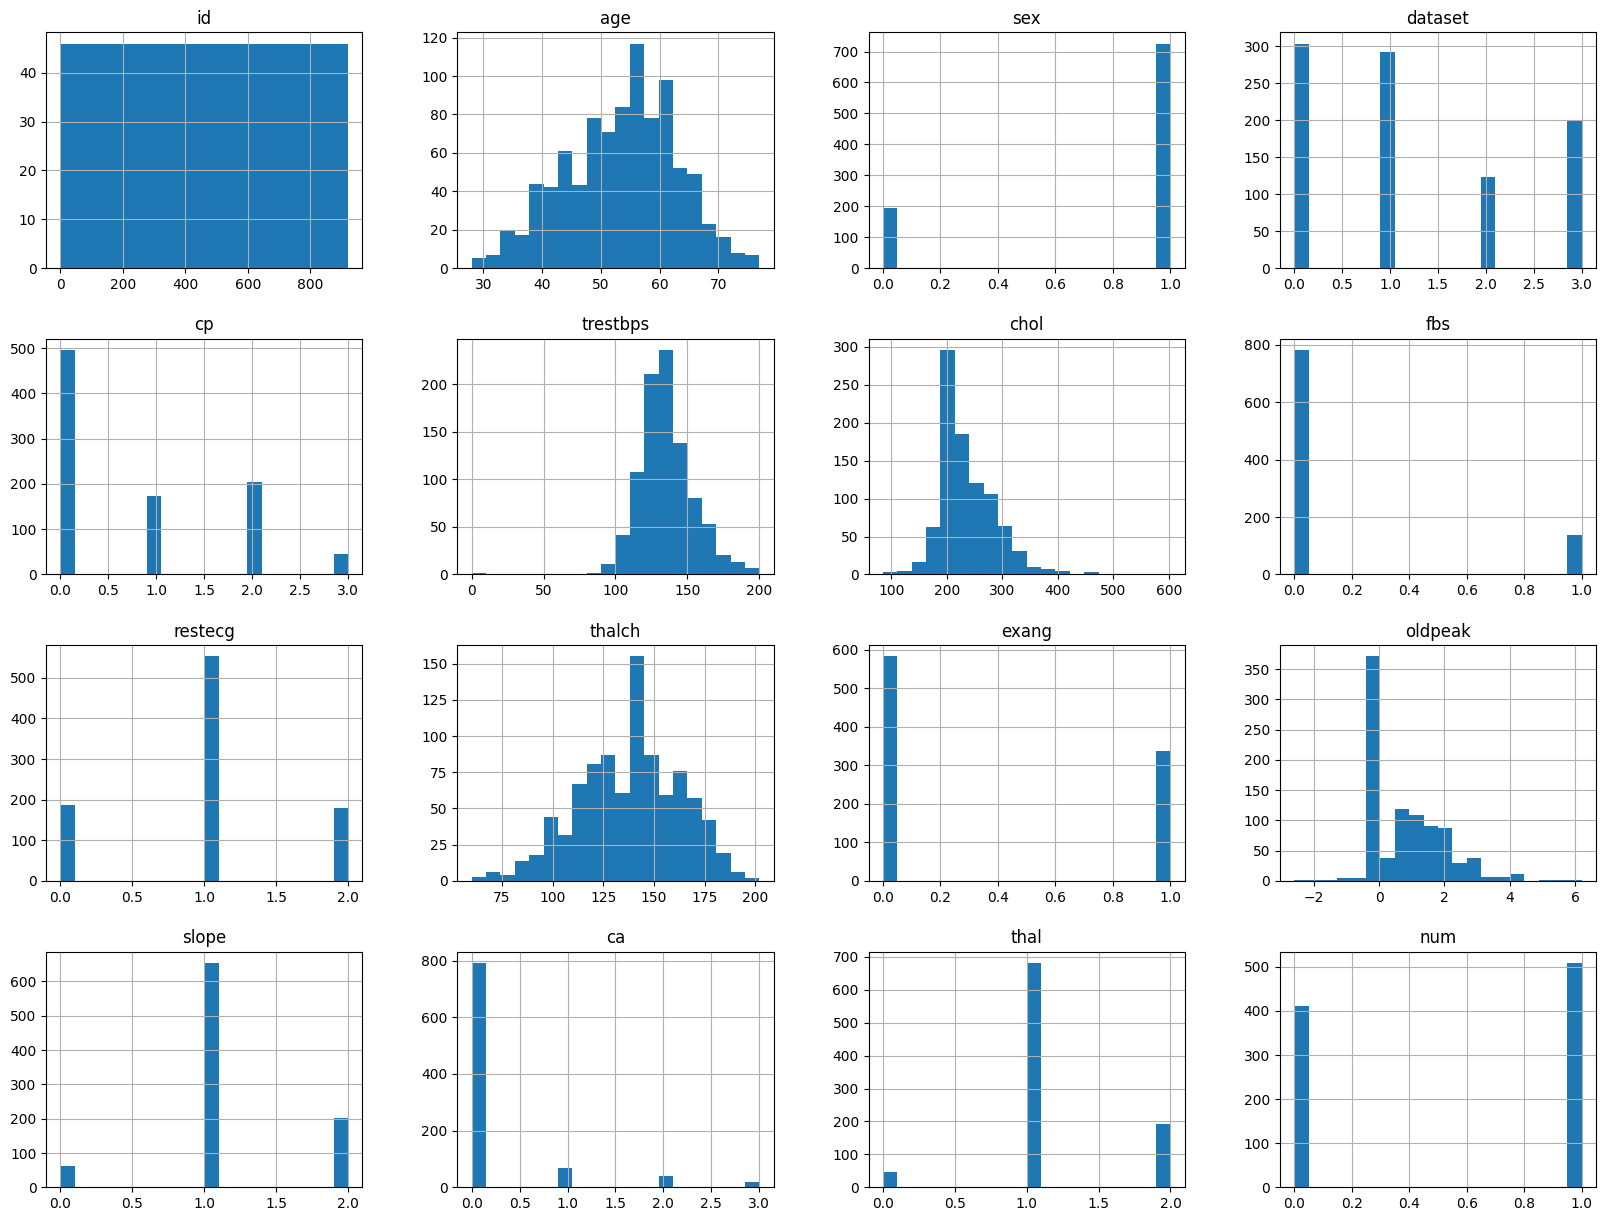

In [ ]:
# Replotting histograms for all features
df.hist(bins=20, figsize=(20, 15))
plt.show()

In [ ]:
# Splitting dataset into training and test sets
X = df.drop('num', axis=1)  # 'num' is our target variable
y = df['num']

# Splitting dataset into training and test sets, maintaining a test set to evaluate model performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80-20 split


In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Decision Tree Implementation
# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)
# Train the model
dt_model.fit(X_train, y_train)
# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

In [ ]:
# K-Nearest Neighbor Implementation
# Initialize the model
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_model.fit(X_train, y_train)
# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

In [ ]:
# Performance Evaluation
# For Decision Tree
print("Decision Tree Results")
print("---------------------")
print("Accuracy:", accuracy_score(y_test, dt_predictions))
print("Classification Report:\n", classification_report(y_test, dt_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))

# For K-Nearest Neighbor
print("\nK-Nearest Neighbor Results")
print("--------------------------")
print("Accuracy:", accuracy_score(y_test, knn_predictions))
print("Classification Report:\n", classification_report(y_test, knn_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_predictions))

Decision Tree Results
---------------------
Accuracy: 0.8260869565217391
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.87      0.80        75
           1       0.90      0.80      0.84       109

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.84      0.83      0.83       184

Confusion Matrix:
 [[65 10]
 [22 87]]

K-Nearest Neighbor Results
--------------------------
Accuracy: 0.8478260869565217
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82        75
           1       0.89      0.85      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184

Confusion Matrix:
 [[63 12]
 [16 93]]


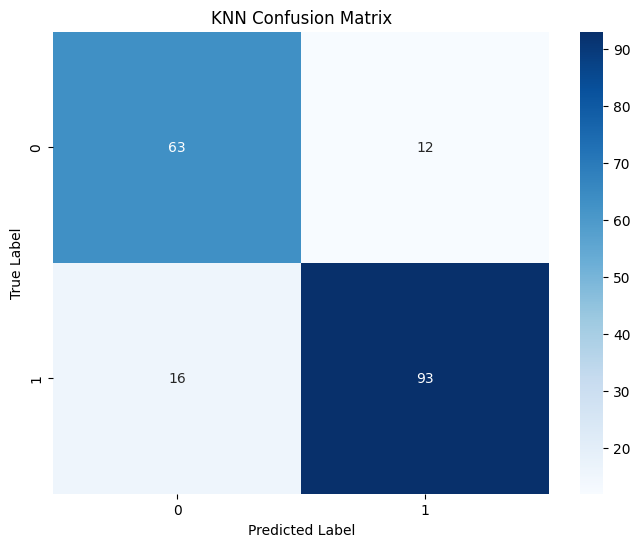

In [ ]:
# Generate confusion matrix and classification report for KNN
conf_matrix = confusion_matrix(y_test, knn_predictions)
class_report = classification_report(y_test, knn_predictions, output_dict=True)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('KNN Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()




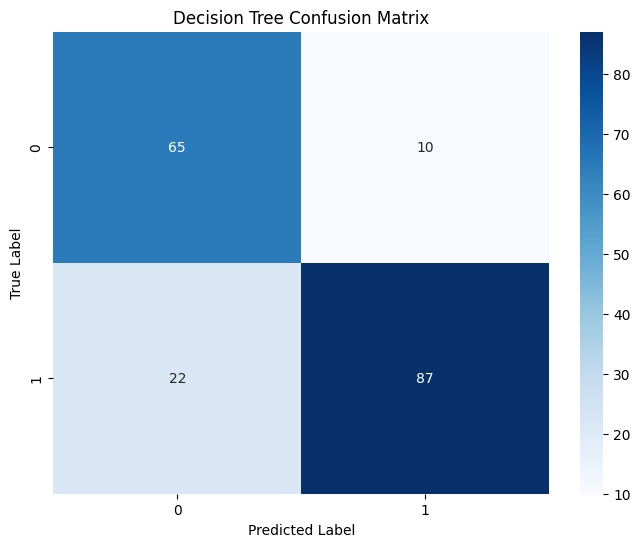

In [ ]:
# Generate the confusion matrix and classification report for Decision Tree
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
dt_class_report = classification_report(y_test, dt_predictions, output_dict=True)

# Plotting the confusion matrix for the Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.title('Decision Tree Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


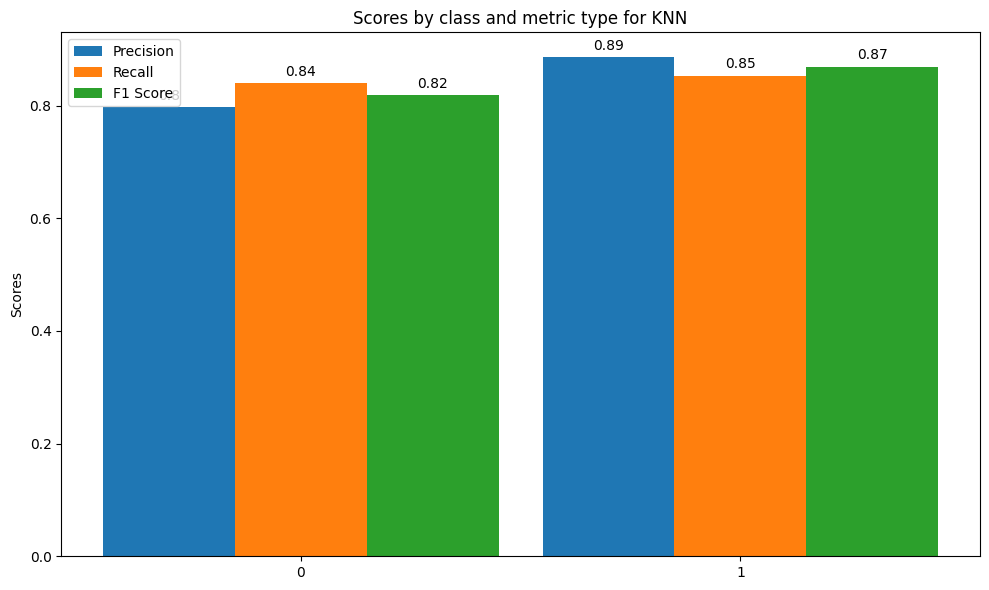

In [ ]:
# Extracting precision, recall, and f1-score for each class for the KNN
precision = []
recall = []
f1_score = []

# # Iterate through labels and extract precision, recall, and F1-score for each
labels = [0, 1]
for label in labels:
    precision.append(class_report[str(label)]['precision'])
    recall.append(class_report[str(label)]['recall'])
    f1_score.append(class_report[str(label)]['f1-score'])

# Creating a bar plot
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision, width, label='Precision')
rects2 = ax.bar(x, recall, width, label='Recall')
rects3 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by class and metric type for KNN')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to attach a text label above each bar, displaying its height
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height,2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function for each bar plot
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

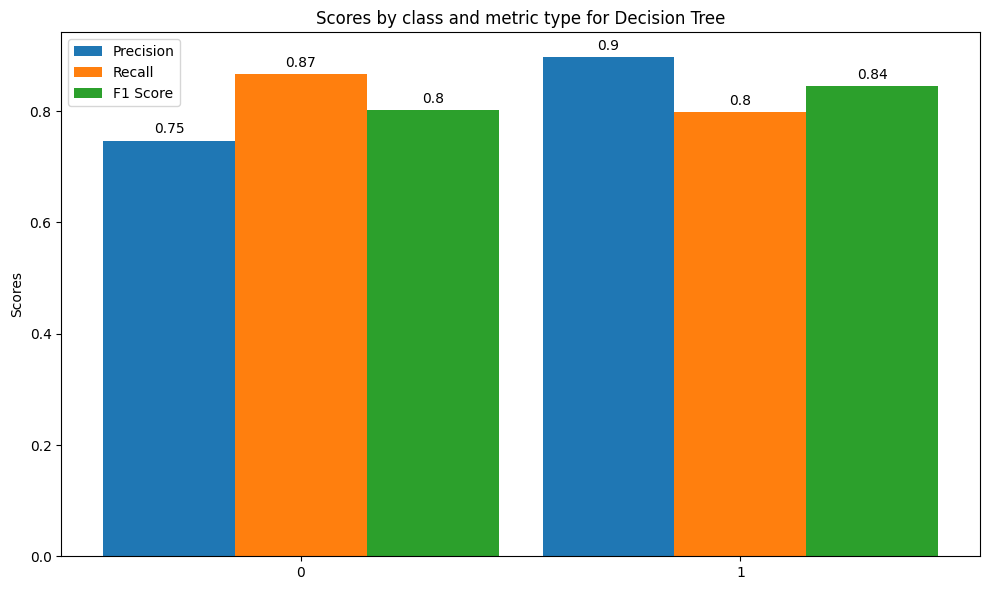

In [ ]:
# Assuming 'dt_class_report' is your classification report dictionary for the Decision Tree
dt_class_report = classification_report(y_test, dt_predictions, output_dict=True)

# Extracting precision, recall, and f1-score for each class for the Decision Tree
dt_precision = []
dt_recall = []
dt_f1_score = []

# Iterate through labels and extract precision, recall, and F1-score for each
labels = [0 , 1]
for label in labels:
    dt_precision.append(dt_class_report[str(label)]['precision'])
    dt_recall.append(dt_class_report[str(label)]['recall'])
    dt_f1_score.append(dt_class_report[str(label)]['f1-score'])

# Creating a bar plot for the Decision Tree
x = np.arange(len(labels))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, dt_precision, width, label='Precision')
rects2 = ax.bar(x, dt_recall, width, label='Recall')
rects3 = ax.bar(x + width, dt_f1_score, width, label='F1 Score')

# Add text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by class and metric type for Decision Tree')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Call the function to attach a text label above each bar
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()
